In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime
from numpy.random import randn,randint
from pandas import DataFrame, Series
from bb_binary import Repository, load_frame_container
from scipy import stats

# Command so that plots appear in the iPython Notebook
%matplotlib inline

repo = Repository('../00_Data/thirdh/')

cam0 = list(repo.iter_fnames(cam=0))[0]
cam1 = list(repo.iter_fnames(cam=1))[0]
cam2 = list(repo.iter_fnames(cam=2))[0]
cam3 = list(repo.iter_fnames(cam=3))[0]

files = [cam0, cam1, cam2, cam3]

df = DataFrame()

# Für jede Datei die Frames einlesen und an DataFrame anhängen
for f in files:
    
    # id - ID des FrameContainers
    # frameIdx - ID von einem Frame: 0 - 1023
    # idx - ID einer Detection: kommt drauf an wie viele es so gibt
    
    fc = load_frame_container(f)
    
    for f in fc.frames:
        # alle Detections von einem Frame
        det = DataFrame([d.to_dict() for d in f.detectionsUnion.detectionsDP])
        det['frame_idx'] = f.frameIdx
        det['fc_id'] = fc.id
        det['cam_id'] = fc.camId
        det = det.set_index(['fc_id', 'frame_idx', 'idx'])
        df = pd.concat([df, det])

df.drop(['descriptor', 'localizerSaliency', 'xposHive', 'yposHive', 'xRotation', 'yRotation'], axis=1, inplace=True)

In [224]:
def get_binary_bit(bit, threshold):
    if (bit <= threshold):
        return 0
    
    if (bit >= 255-threshold):
        return 1
    
    else:
        return np.nan

# Zum ausrechnen der IDs
def get_detected_id(id):
    
    threshold = 30
    
    # Umrechnen in binary array [0,1,1,1,0,1,1,1,0,0,0,1]
    # Ids die nicht umgerechnet werden können, weil außerhalb des threshold, werden NAN
    binary_id = [get_binary_bit(i, threshold) for i in id]

    decimal_id = np.nan

    if not np.isnan(binary_id).any():
        # convert to decimal id using 11 least significant bits
        decimal_id = int(''.join([str(c) for c in binary_id[:11]]), 2)

        # determine what kind of parity bit was used and add 2^11 to decimal id
        # uneven parity bit was used
        if ((sum(binary_id) % 2) == 1):
            decimal_id += 2048

    return decimal_id

In [225]:
df['id'] = df.decodedId.apply(get_detected_id)
df_ids = df.dropna()
df_ids.drop(['decodedId', 'radius'], axis=1, inplace=True)
df_ids.head(10)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


xpos  ypos  zRotation  cam_id      id
fc_id                frame_idx idx                                       
-5179138378376356864 0         0     102  1750   0.010662       0  2096.0
                               1     100  2362  -1.891746       0   941.0
                               2     175  1562   0.573300       0  1404.0
                               4     388  2124   2.327337       0   133.0
                               5     425   812  -1.252054       0   585.0
                               6     449  1664   1.664661       0   289.0
                               7     450  2677   1.795066       0  2507.0
                               8     476  1826  -0.389227       0   673.0
                               10    652  1887   0.301280       0  3260.0
                               11    712  1049  -1.764035       0  1001.0

In [226]:
#test = DataFrame({'x': [1,2,3], 'y':[2,4,6], 'z':[10,11,12]})
#test = test.set_index(['z'])
#test = test.set_index(['x'], append=True)
#test

#df_ids = df_ids.set_index(['id'], append=True)
# df_ids.head()

In [251]:
gr = df_ids.groupby(level='frame_idx')

In [252]:
dft = DataFrame(columns=np.arange(1024))

In [253]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


In [255]:
dft['ids'] = u_id
dft = dft.set_index(['ids'])
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
ids,,,,,,,,,,,,,,,,,,,,,
2096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
df_ids.head()

xpos  ypos  zRotation  cam_id      id
fc_id                frame_idx idx                                       
-5179138378376356864 0         0     102  1750   0.010662       0  2096.0
                               1     100  2362  -1.891746       0   941.0
                               2     175  1562   0.573300       0  1404.0
                               4     388  2124   2.327337       0   133.0
                               5     425   812  -1.252054       0   585.0

In [257]:
for i, group in gr:
    l = group['id']
    dft.loc[l,i] = 1

In [258]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
ids,,,,,,,,,,,,,,,,,,,,,
2096.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1404.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
133.0,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [259]:
dft.shape

(758, 1024)

In [260]:
dft['total'] = dft.sum(axis=1)
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,total
ids,,,,,,,,,,,,,,,,,,,,,
2096.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
941.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,793.0
1404.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,453.0
133.0,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602.0
585.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1020.0


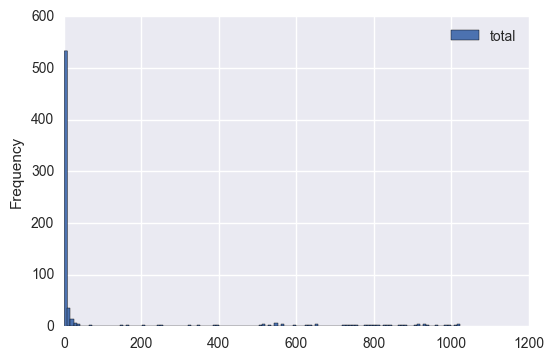

In [282]:
dft.plot.hist(y='total', bins=128)

In [271]:
dft.total.value_counts()

1.0       295
2.0        96
3.0        43
5.0        30
4.0        29
6.0        18
7.0        17
9.0        11
10.0        6
11.0        5
8.0         5
15.0        4
16.0        4
17.0        3
12.0        3
29.0        3
550.0       3
13.0        3
34.0        3
19.0        2
917.0       2
801.0       2
21.0        2
18.0        2
549.0       2
22.0        2
149.0       2
833.0       2
1022.0      2
961.0       2
         ... 
649.0       1
883.0       1
1014.0      1
778.0       1
638.0       1
937.0       1
974.0       1
353.0       1
602.0       1
362.0       1
445.0       1
846.0       1
207.0       1
1004.0      1
802.0       1
732.0       1
900.0       1
942.0       1
788.0       1
161.0       1
794.0       1
235.0       1
309.0       1
418.0       1
547.0       1
478.0       1
534.0       1
201.0       1
644.0       1
650.0       1
Name: total, dtype: int64

### Die Bienen die ganz lange da sind, wo befinden die sich, die Bienen die nur ganz kurz da sind, wo befinden die sich auf der Wabe?

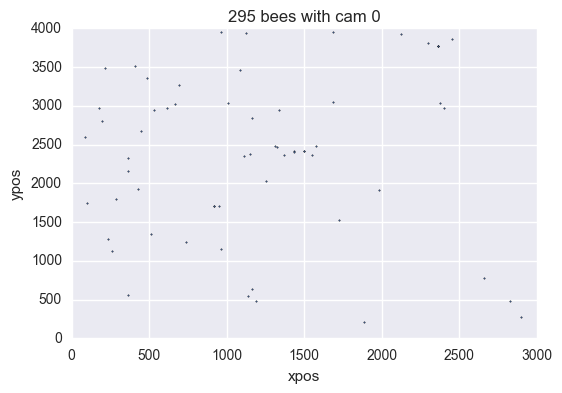

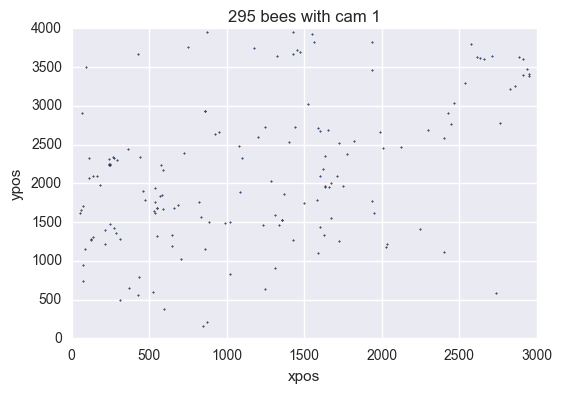

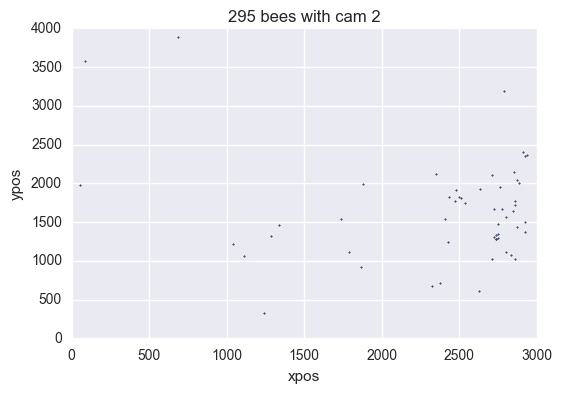

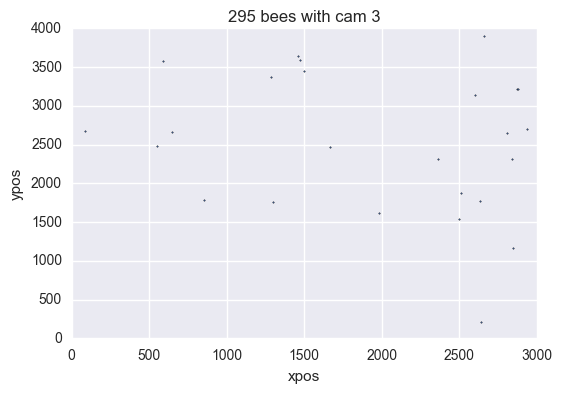

In [272]:
short = dft[dft.total < 2].index
plot(df_ids, short)

In [117]:
def plot(df, ids):
    df = df.set_index(['id'])
    gr = df.ix[ids].groupby('cam_id')
    
    for i, group in gr:
        plt.figure()
        
        if (len(ids) > 1):
            t = "{} bees with cam {}".format(len(ids), i)
        else:
            t = "Bees ID {} and cam {}".format(ids[0], i)
        group.plot.scatter(x='xpos', y='ypos', s=1, title=t, xlim=(0,3000), ylim=(0,4000))

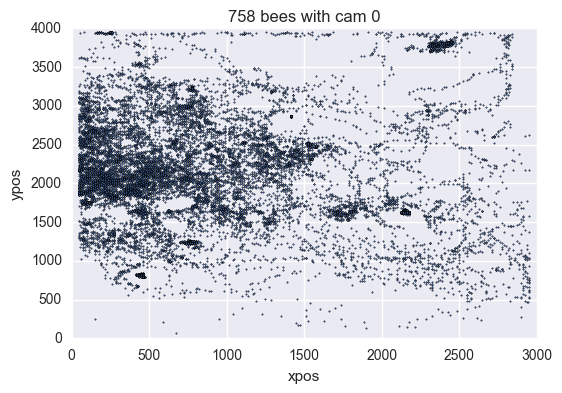

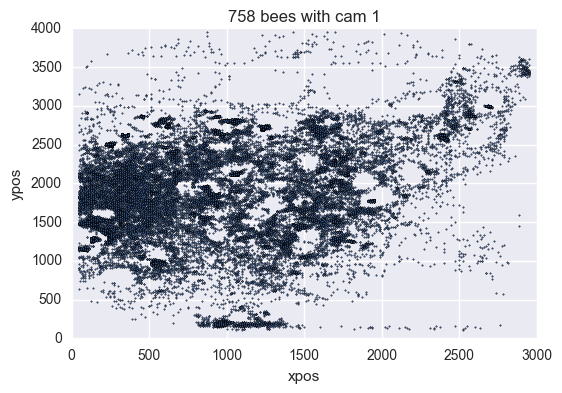

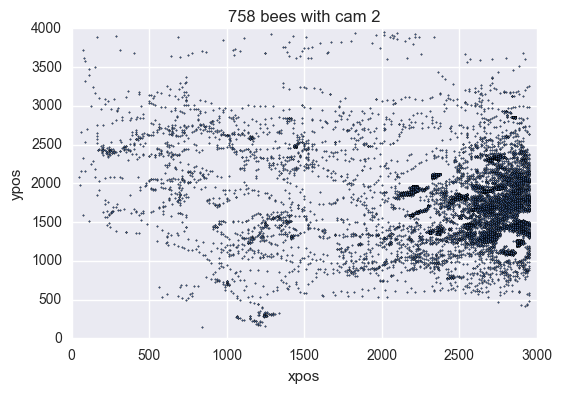

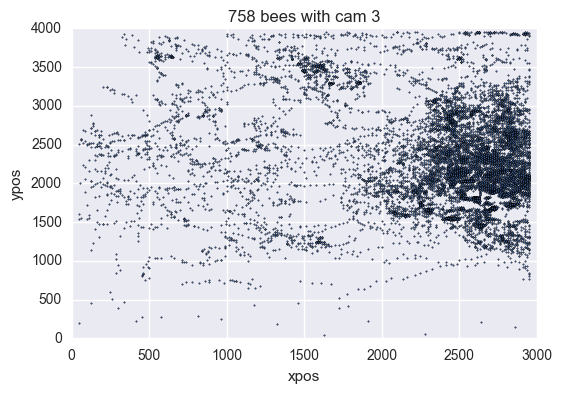

In [274]:
long = dft[dft.total > 850 & (dft.total < 900)].index
plot(df_ids, long)

In [275]:
dft[dft.total > 1000]

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,total
ids,,,,,,,,,,,,,,,,,,,,,
585.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1020.0
1744.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1022.0
832.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1019.0
1713.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1004.0
2430.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1022.0
808.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1013.0
1965.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1014.0
397.0,1,1,1,1,1,1,1,1,1,1,...,1,NaN,NaN,1,1,1,1,1,1,1019.0


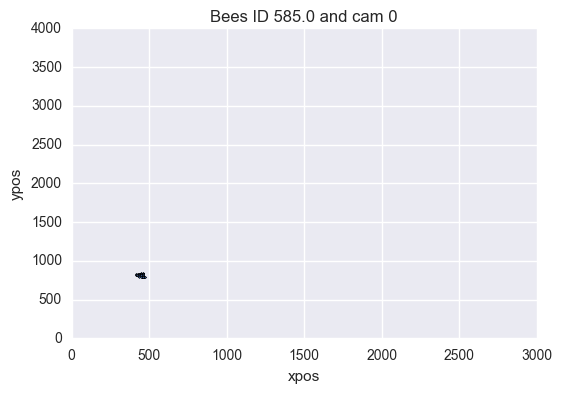

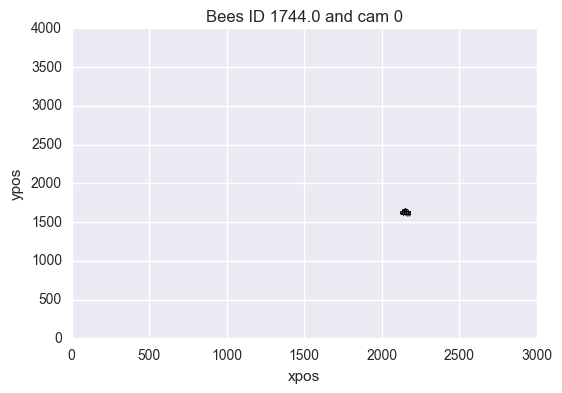

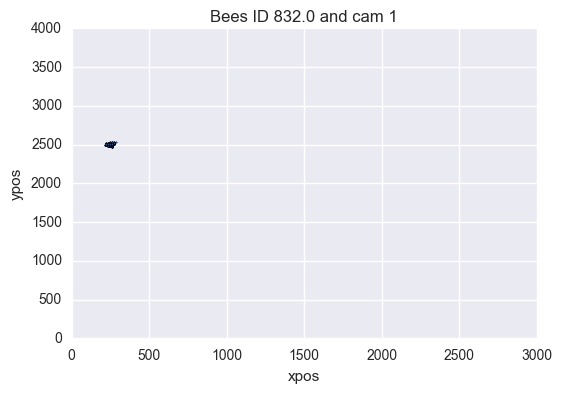

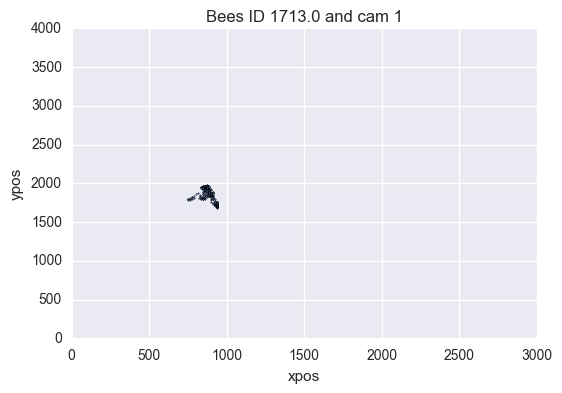

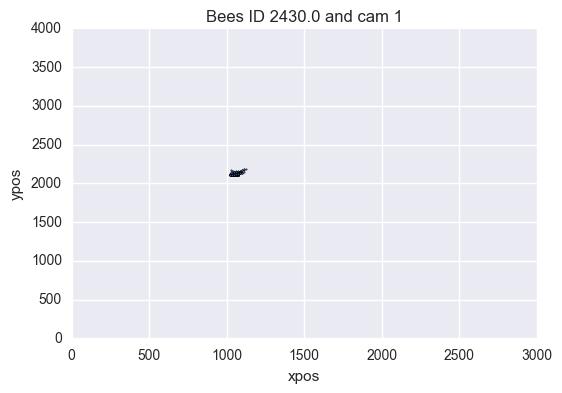

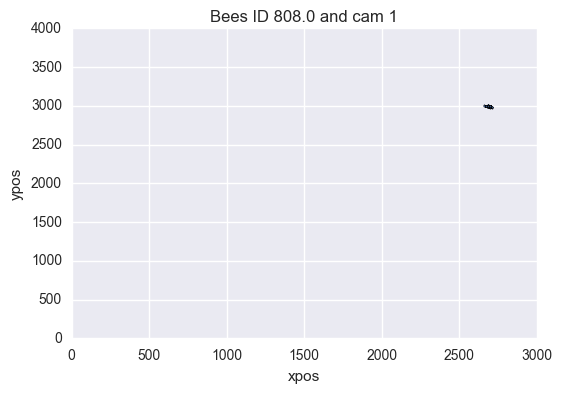

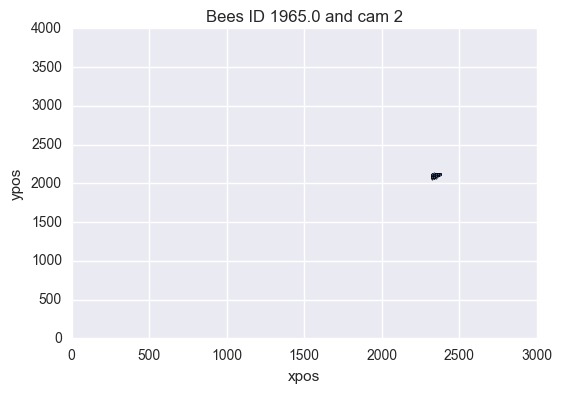

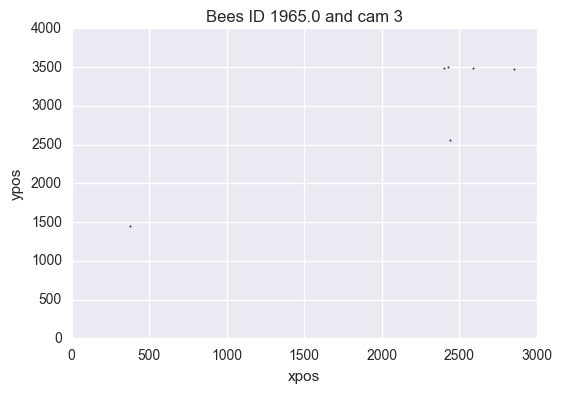

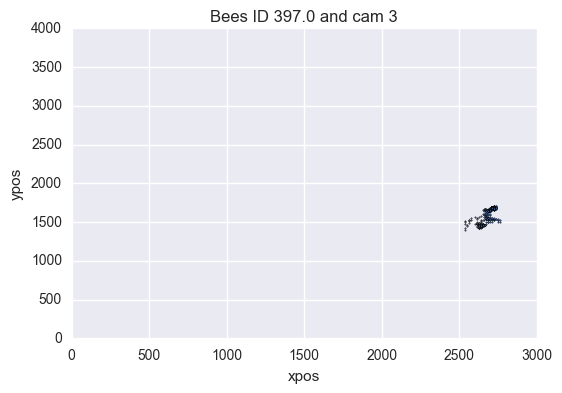

In [283]:
vl = dft[dft.total > 1000].index

for i in vl:
    plot(df,[i])

In [284]:
vl = dft[(dft.total > 850) & (dft.total < 900)].index

In [285]:
vl

Float64Index([673.0, 261.0, 737.0, 21.0, 173.0, 81.0, 709.0, 1885.0], dtype='float64', name='ids')

/usr/local/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


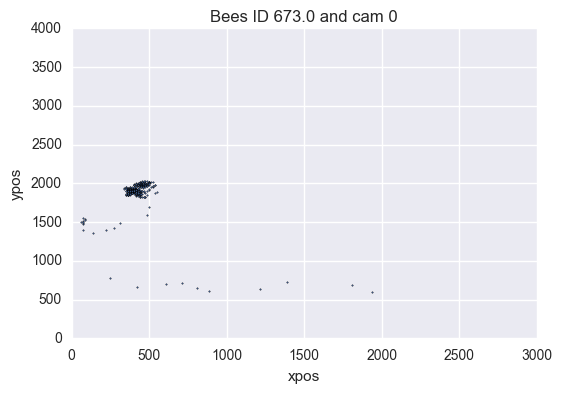

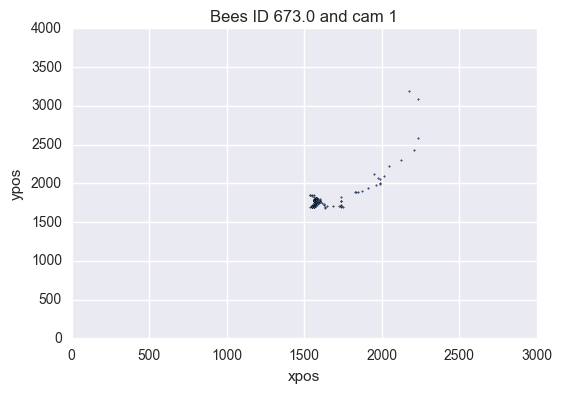

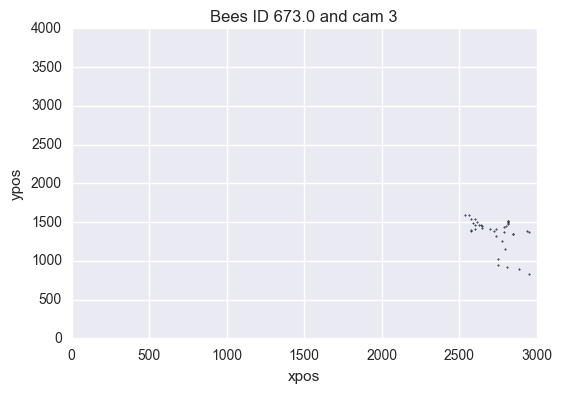

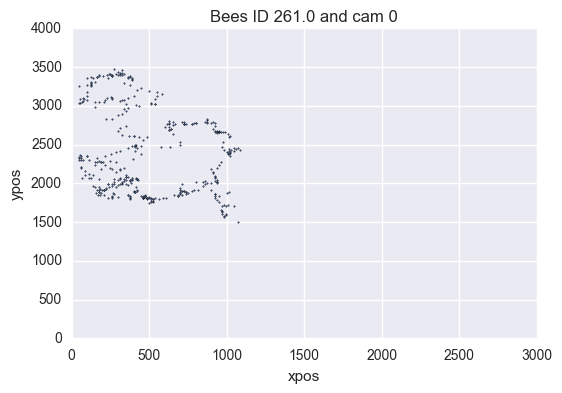

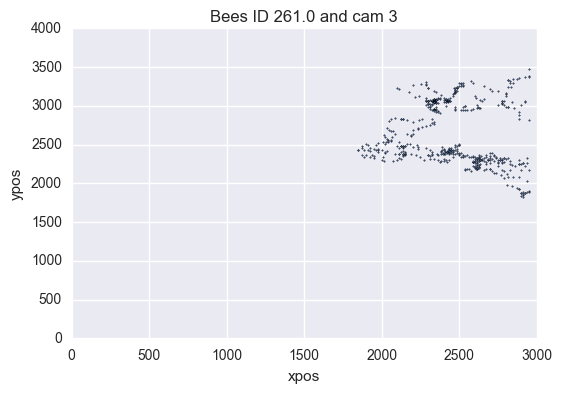

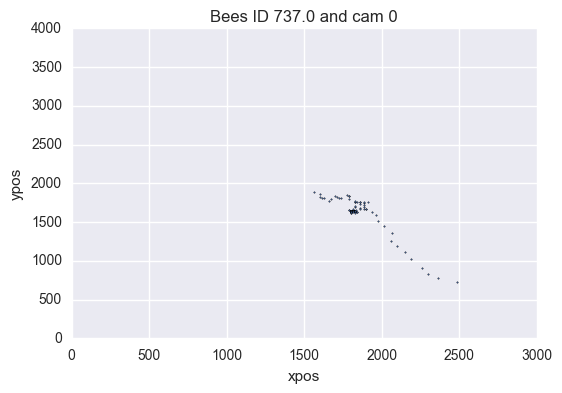

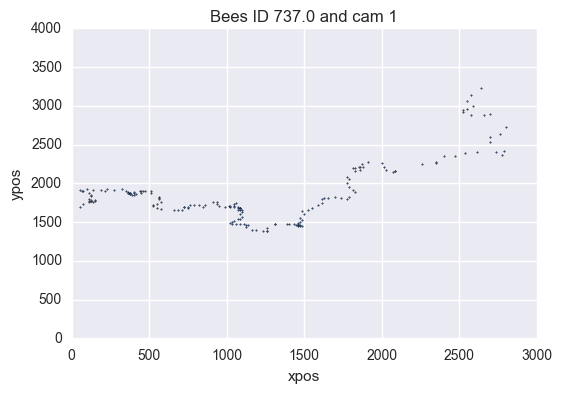

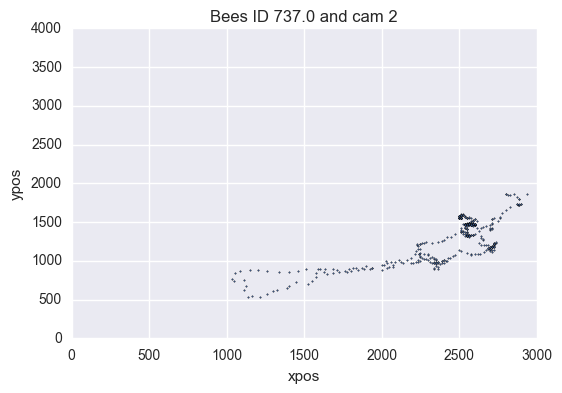

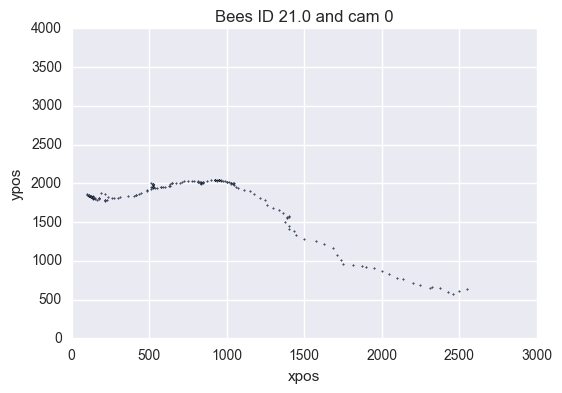

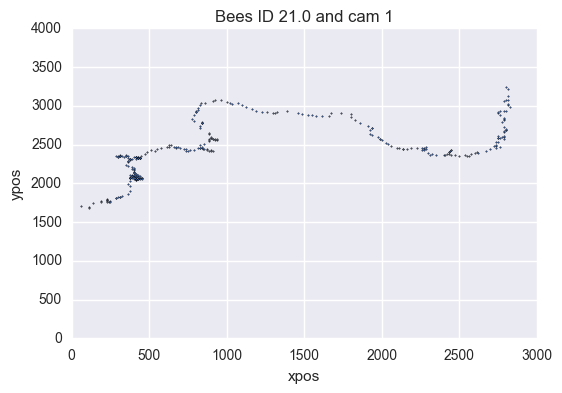

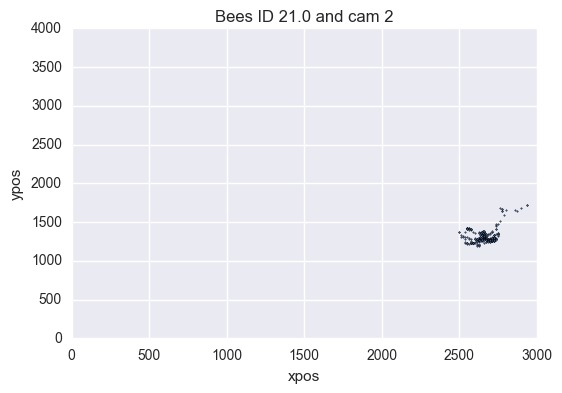

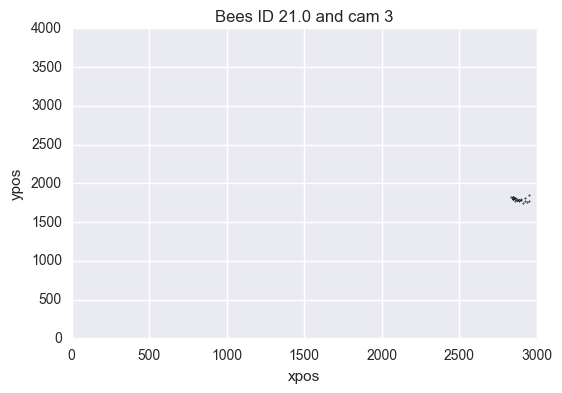

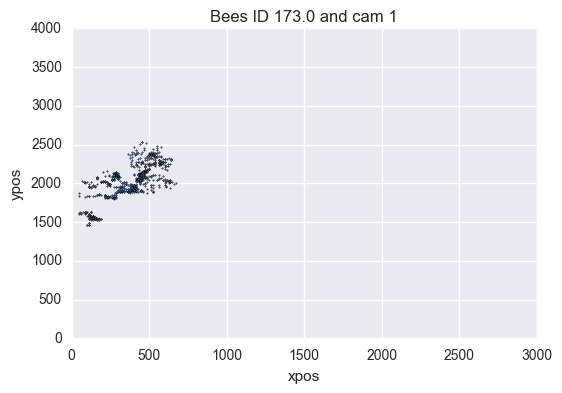

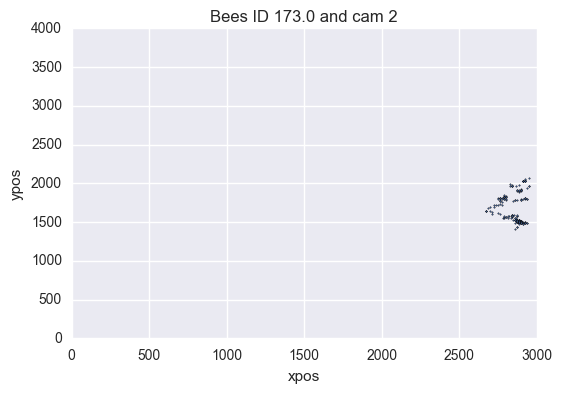

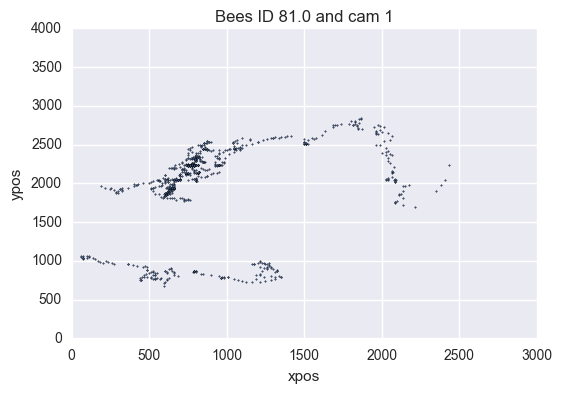

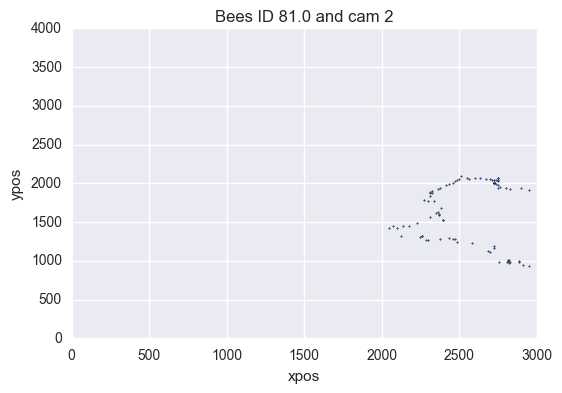

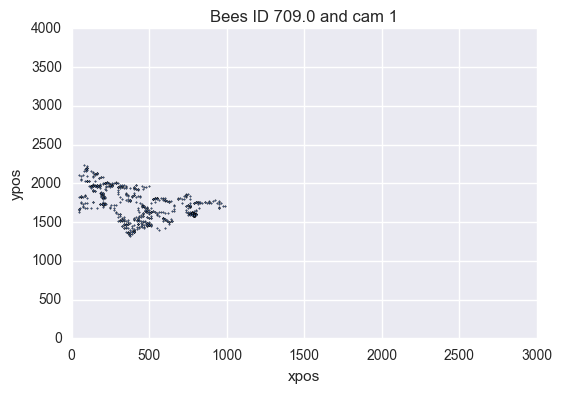

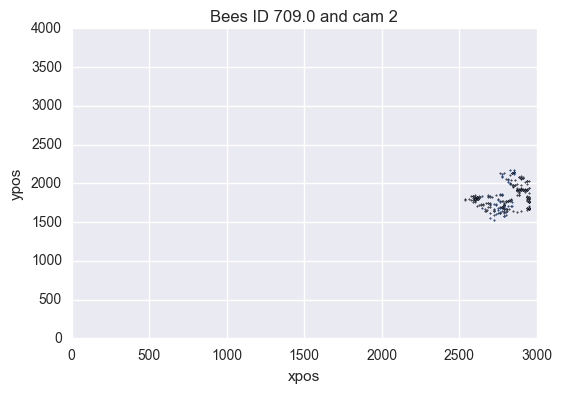

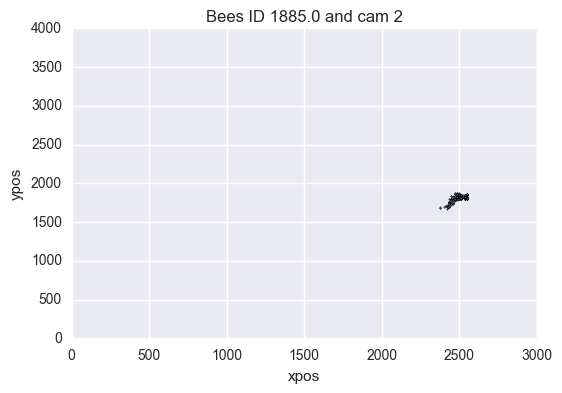

In [286]:
for i in vl:
    plot(df,[i])